Importing all the necessary Libraries

In [1]:
#Packages / libraries
#import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
#make the plot outputs appear and be stored within the notebook

# To install sklearn type "pip install numpy scipy scikit-learn" to the Anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})


# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree # used to visualize the decision tree model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# conda install python-graphviz


In [2]:
#1. Reading the dataset. 

raw_data = pd.read_csv('Cardiovascular_Synthetic_Tabular_Data.csv', delimiter=';')

print(raw_data.shape)

raw_data

(20000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18666,1,164,77,125,102,1,1,0,0,1,0
1,17680,2,153,70,123,96,1,1,0,0,1,0
2,17900,2,155,70,118,97,2,1,1,0,1,1
3,19381,2,170,79,139,102,1,1,0,0,1,1
4,18101,1,159,72,126,91,2,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,16572,1,142,66,112,86,1,1,0,0,1,0
19996,19073,1,165,75,126,101,1,1,1,0,1,0
19997,17915,1,156,70,122,96,2,1,0,0,1,0
19998,15961,1,137,63,109,81,1,1,0,0,1,1


In [3]:
#2. Finding any duplicates, if any null value exit droping them. 

print(raw_data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [4]:
#3. Data pre-processing 

#Changing the age from days to years. 
raw_data['age'] = raw_data['age'] / 365

raw_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,51.139726,1,164,77,125,102,1,1,0,0,1,0
1,48.438356,2,153,70,123,96,1,1,0,0,1,0
2,49.041096,2,155,70,118,97,2,1,1,0,1,1
3,53.098630,2,170,79,139,102,1,1,0,0,1,1
4,49.591781,1,159,72,126,91,2,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,45.402740,1,142,66,112,86,1,1,0,0,1,0
19996,52.254795,1,165,75,126,101,1,1,1,0,1,0
19997,49.082192,1,156,70,122,96,2,1,0,0,1,0
19998,43.728767,1,137,63,109,81,1,1,0,0,1,1


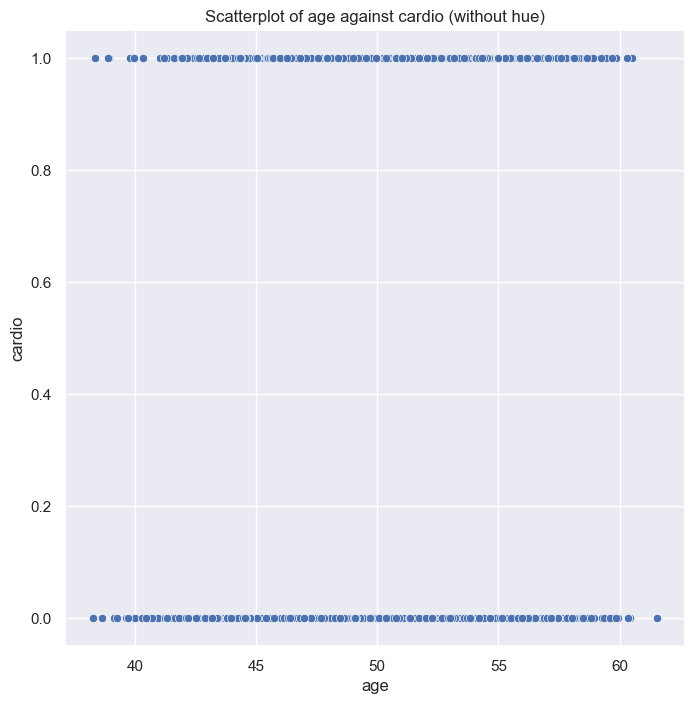

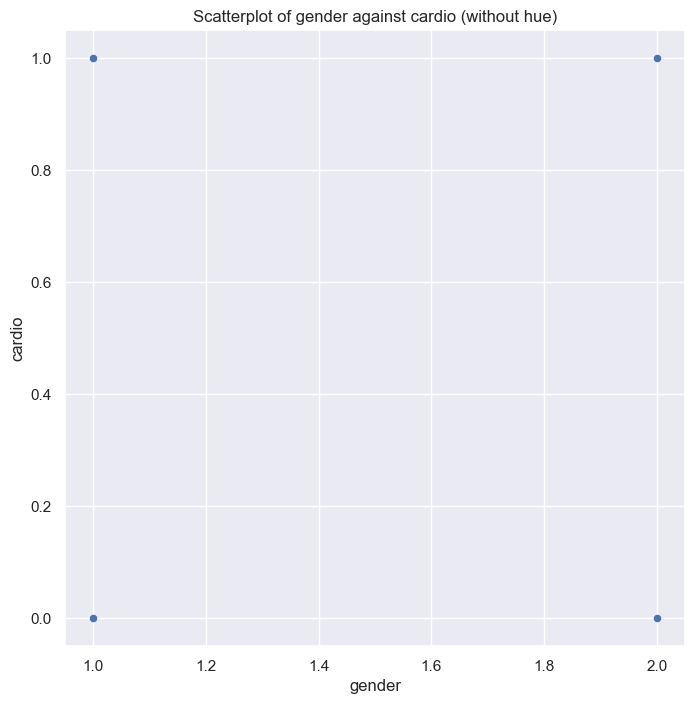

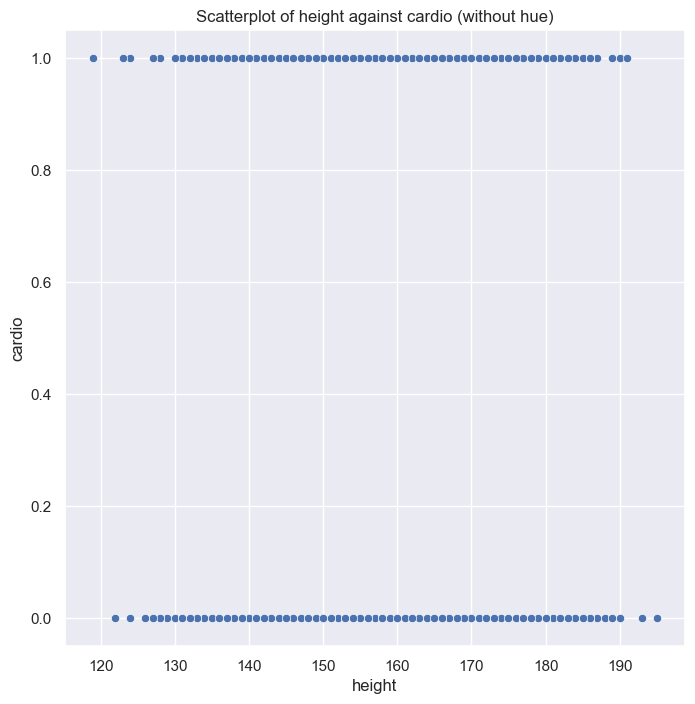

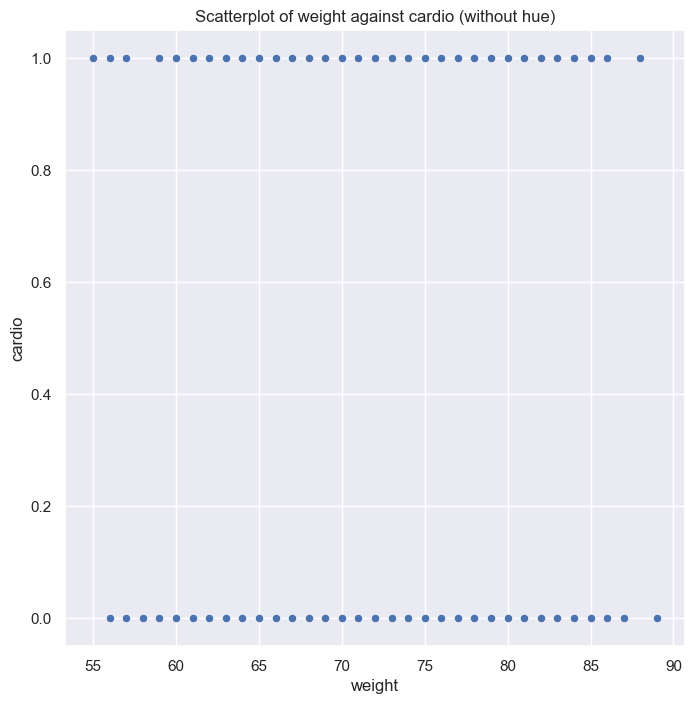

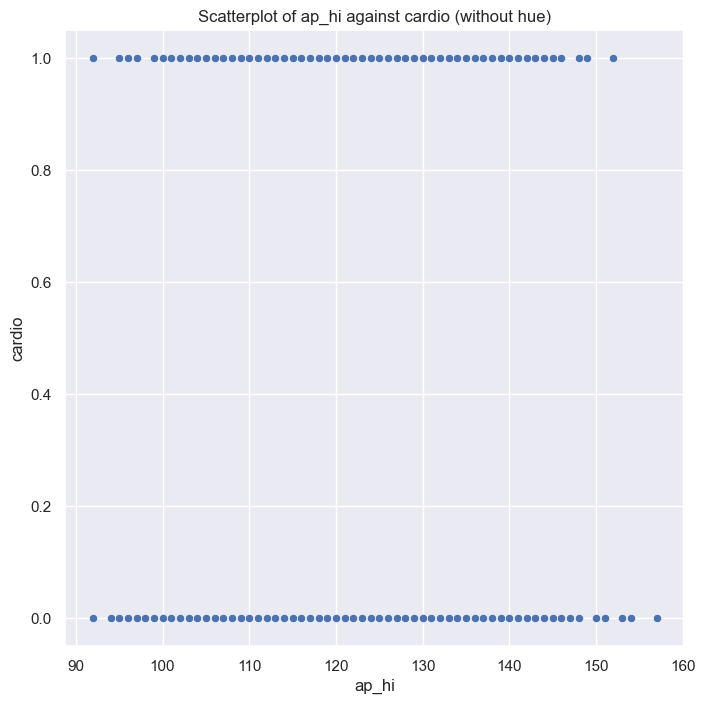

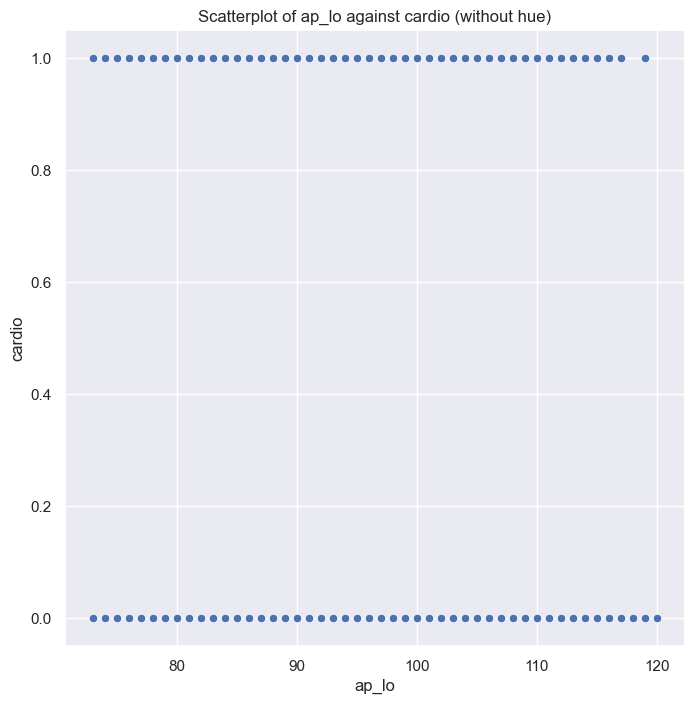

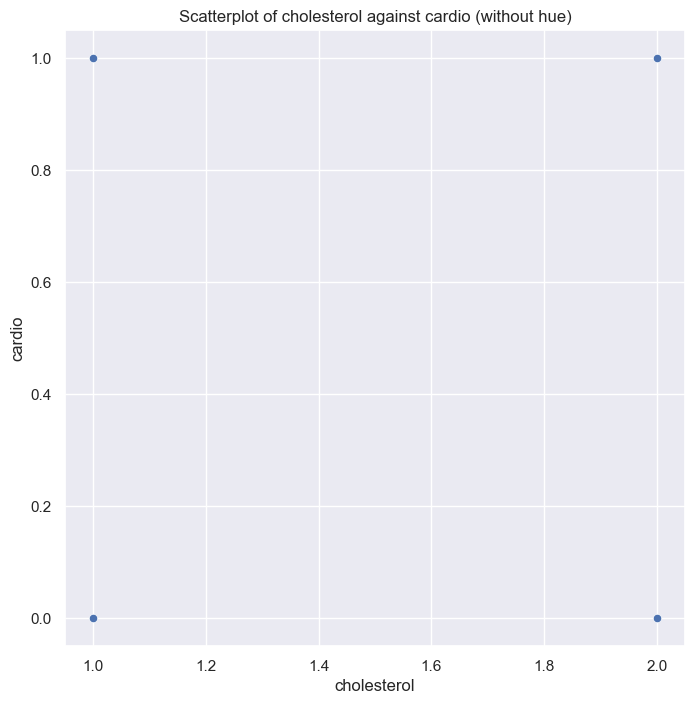

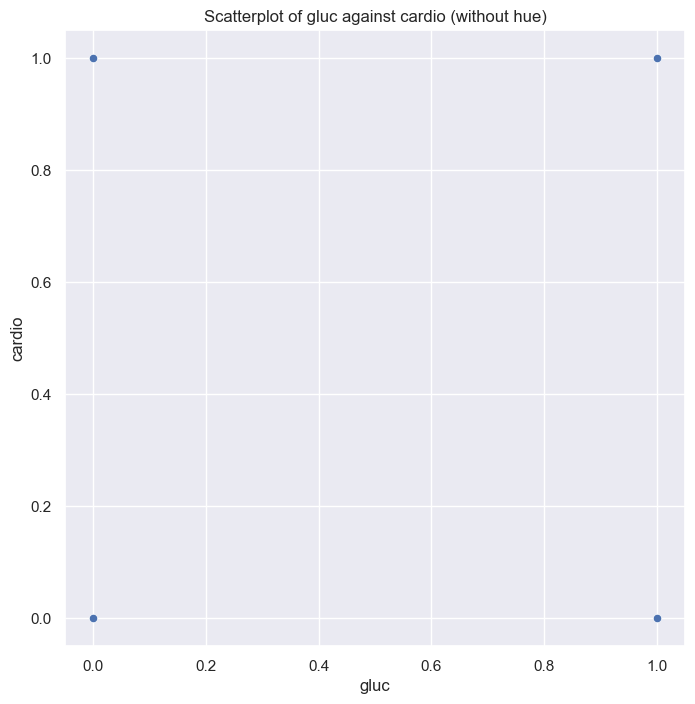

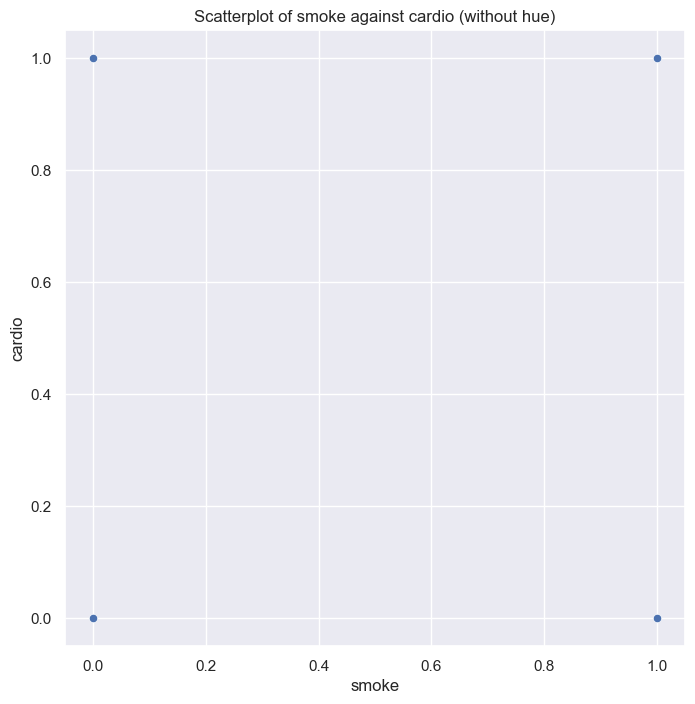

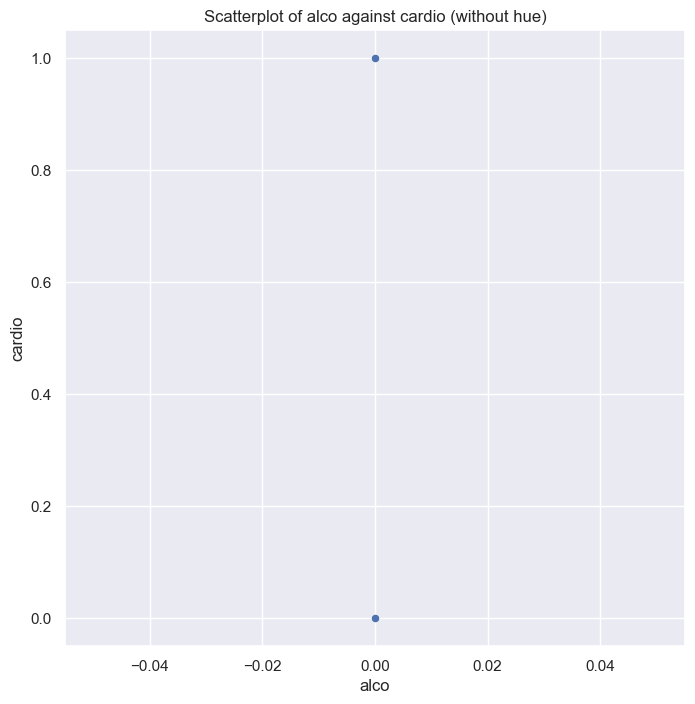

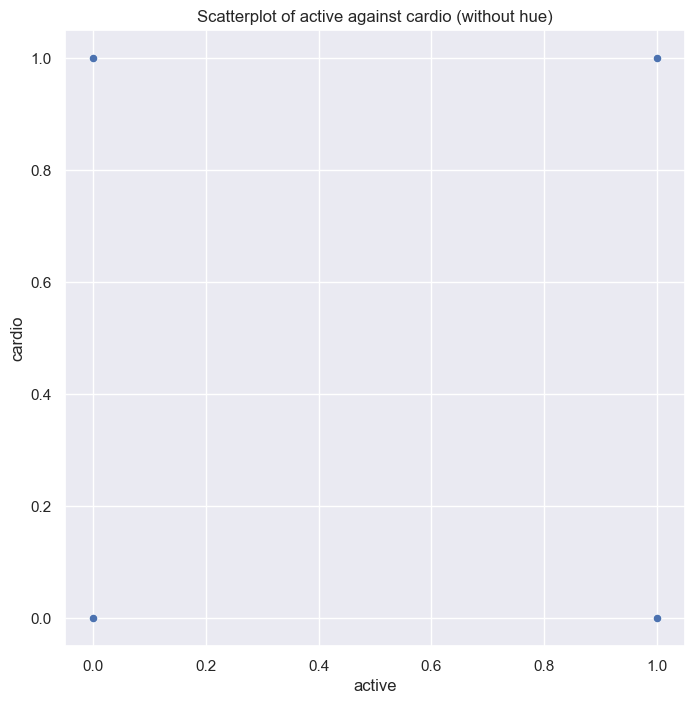

In [5]:
#how the cardio varies with all other features. 


# Loop for scatter plots without hue
for feature in raw_data.columns:
    if feature != 'cardio':
        plt.figure(figsize=(8, 8))
        sns.scatterplot(x=feature, y='cardio', data=raw_data)
        plt.xlabel(feature)
        plt.ylabel('cardio')
        plt.title(f'Scatterplot of {feature} against cardio (without hue)')
        plt.show()

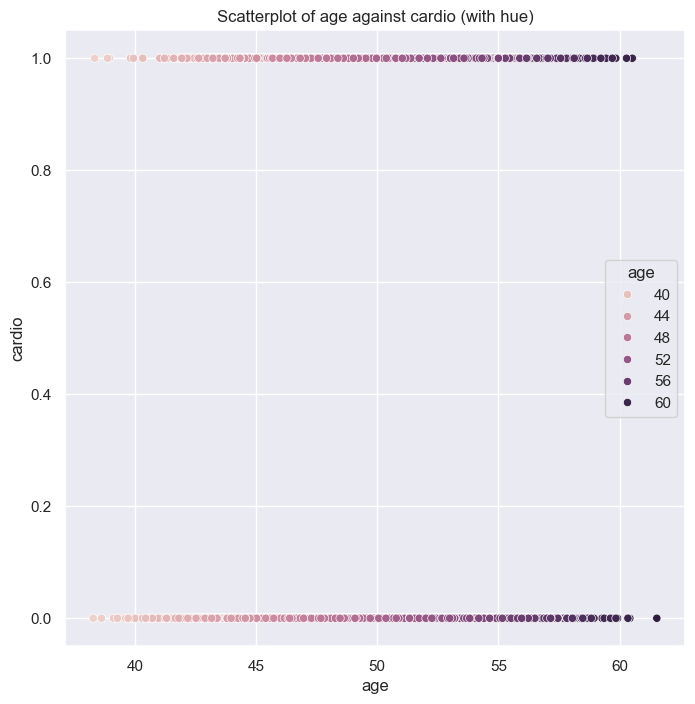

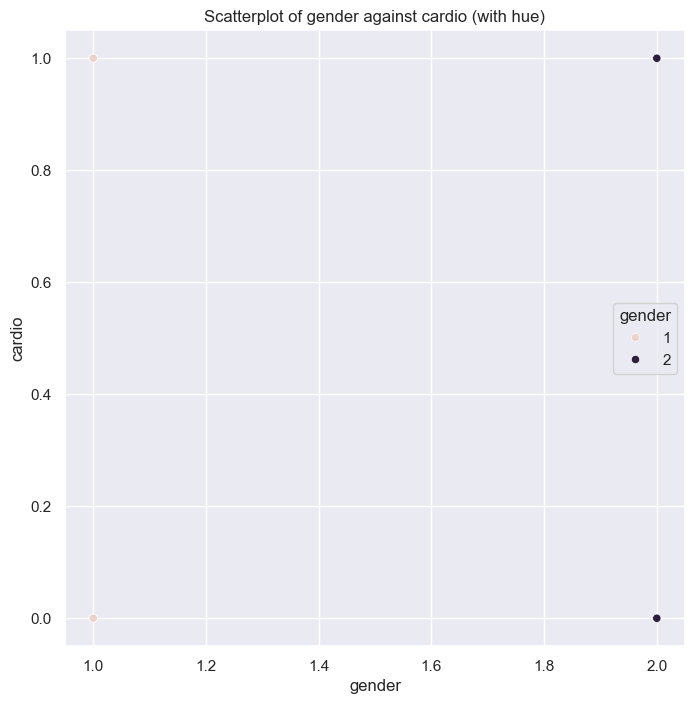

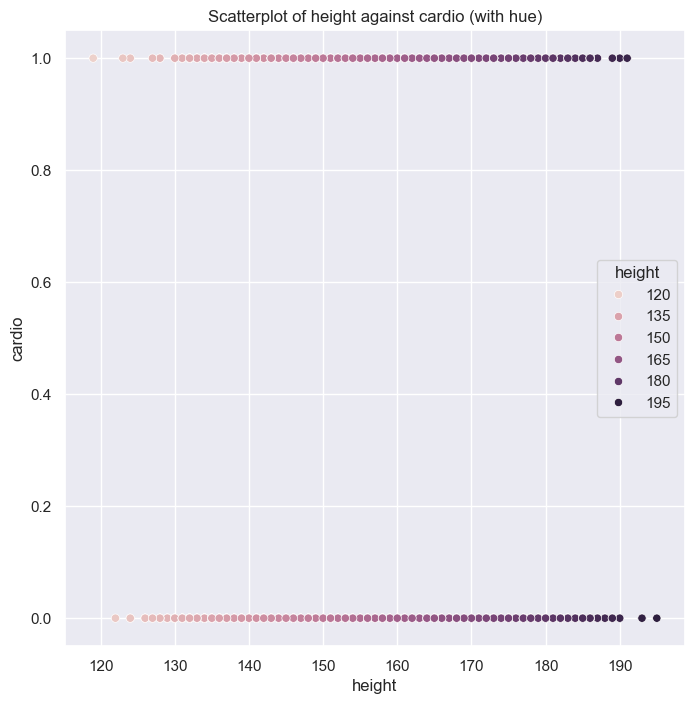

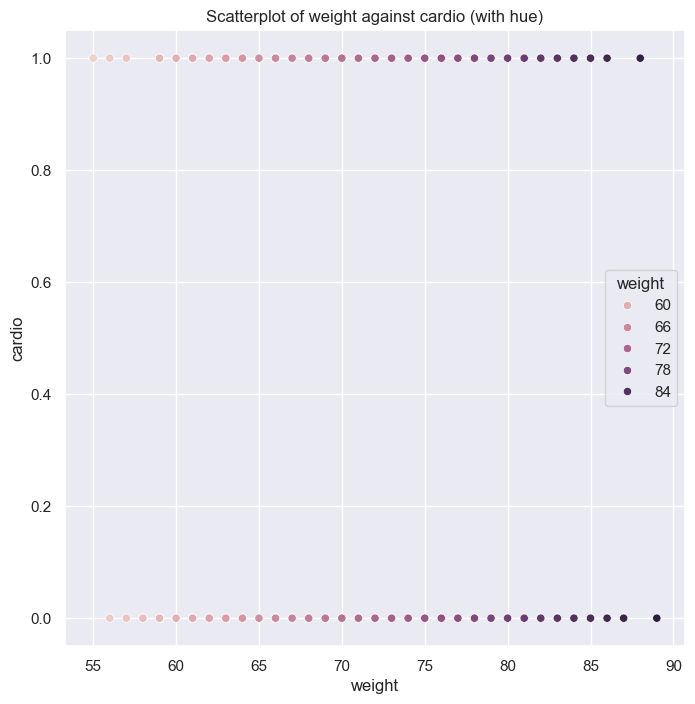

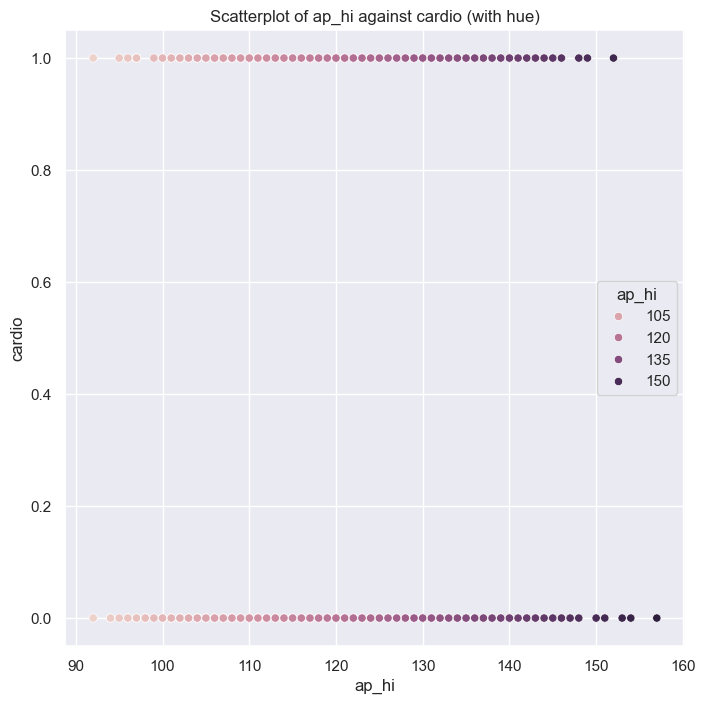

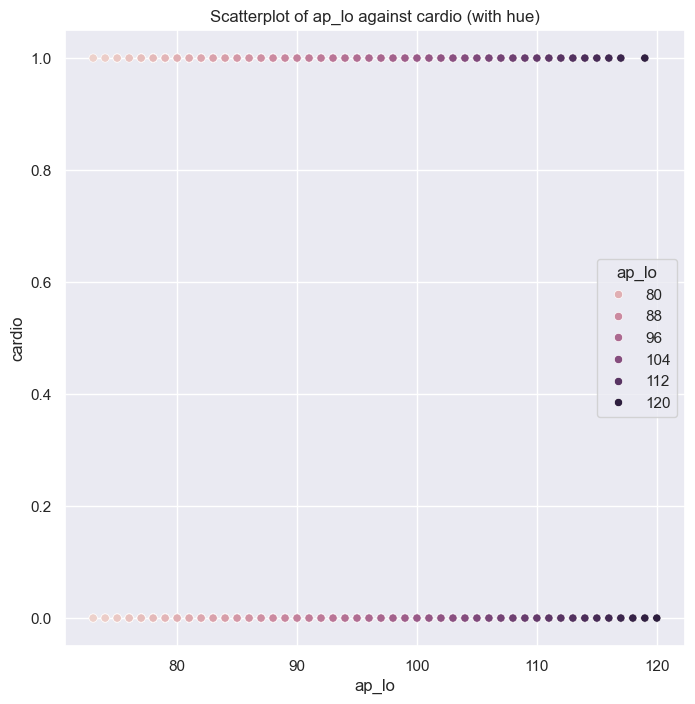

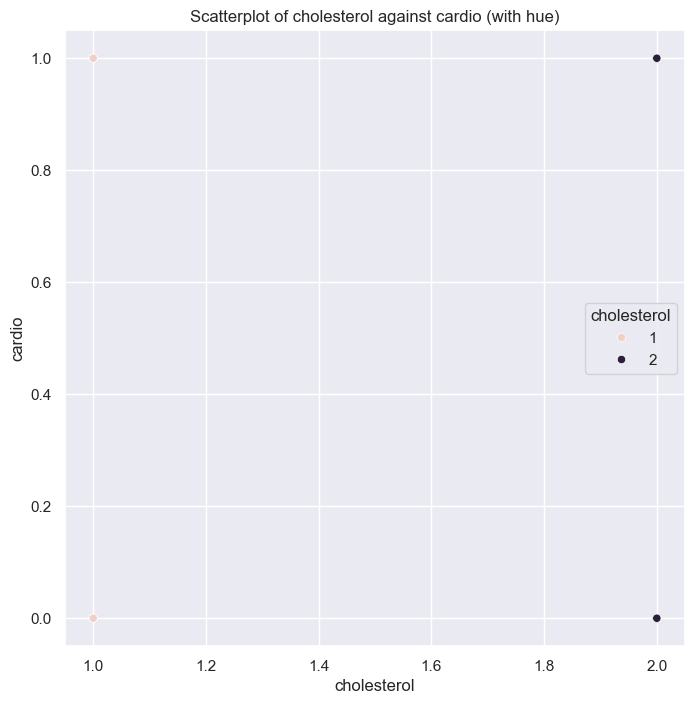

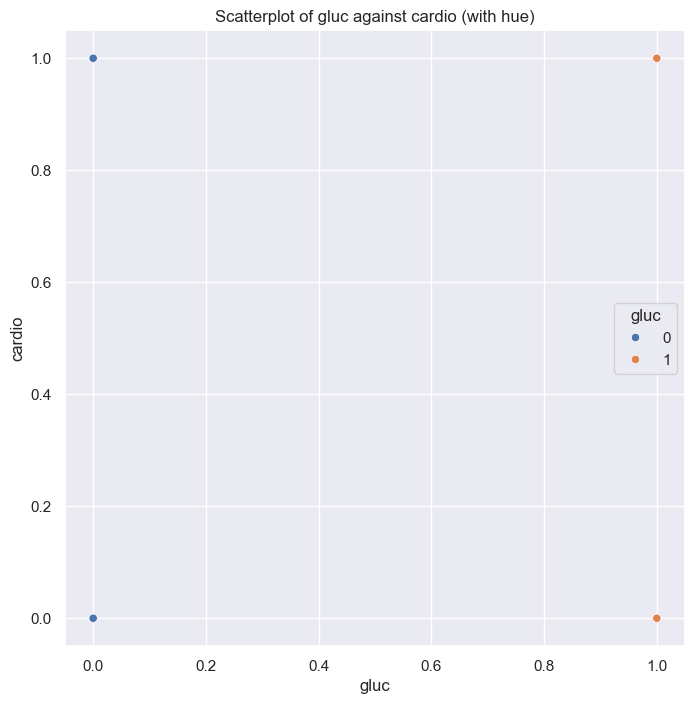

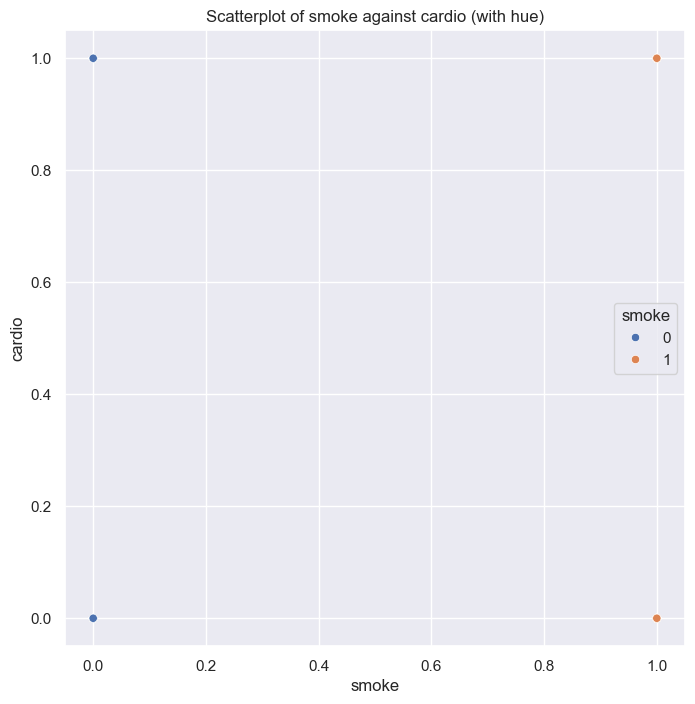

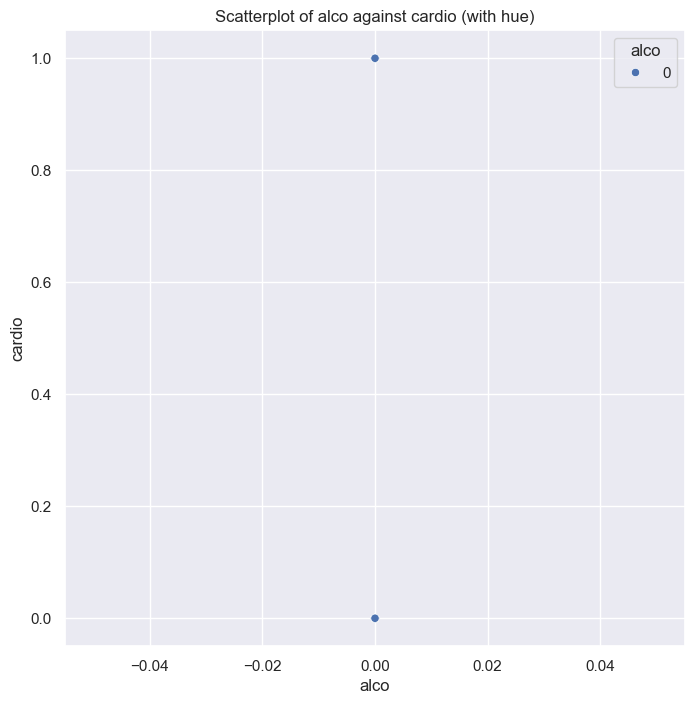

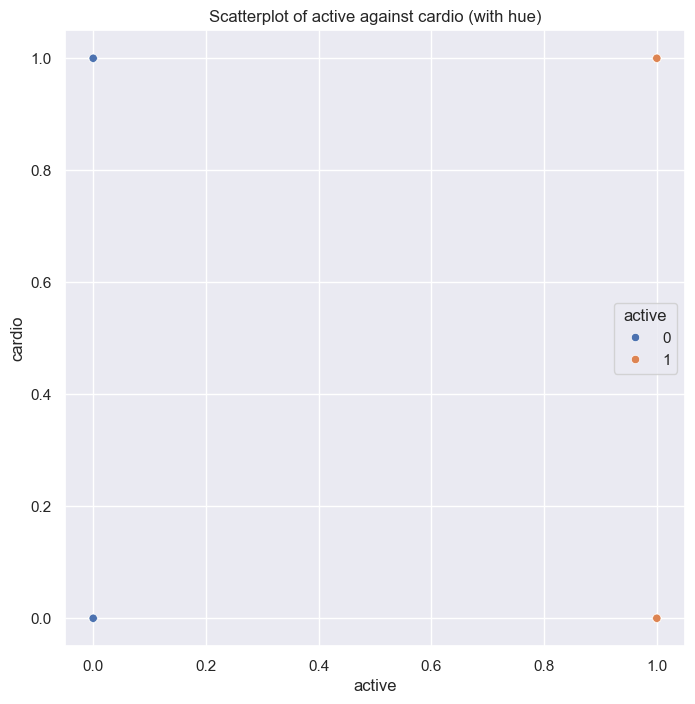

In [6]:
# Loop for scatter plots with hue 
for feature in raw_data.columns:
    if feature != 'cardio':
        plt.figure(figsize=(8, 8))
        sns.scatterplot(x=feature, y='cardio', hue=feature, data=raw_data)
        plt.xlabel(feature)
        plt.ylabel('cardio')
        plt.title(f'Scatterplot of {feature} against cardio (with hue)')
        plt.show()


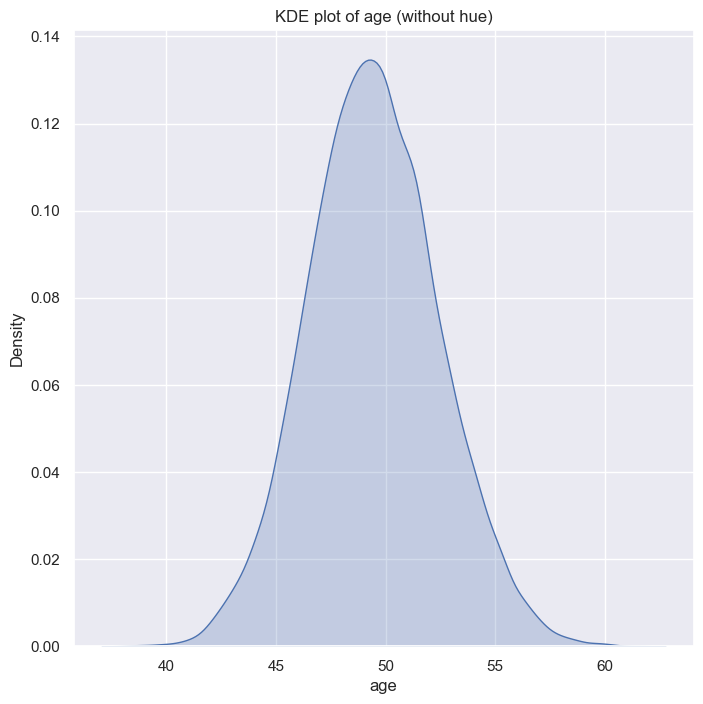

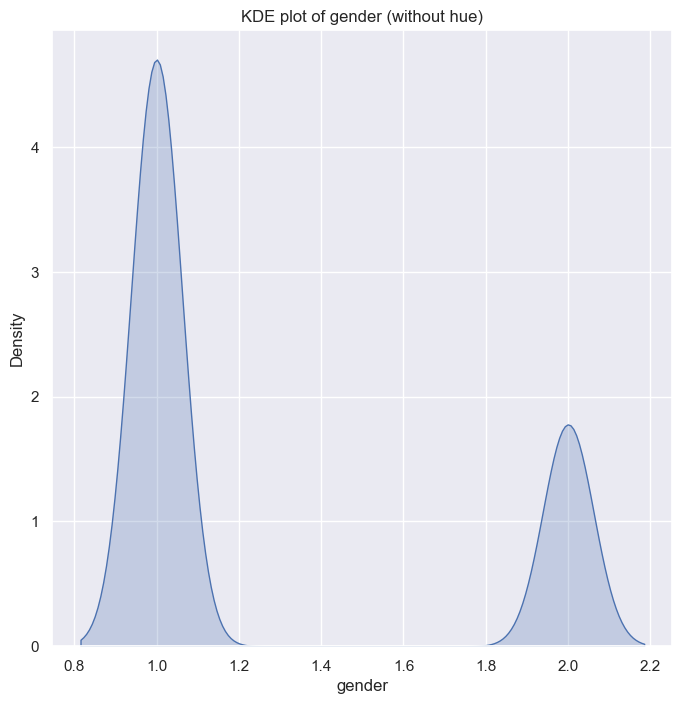

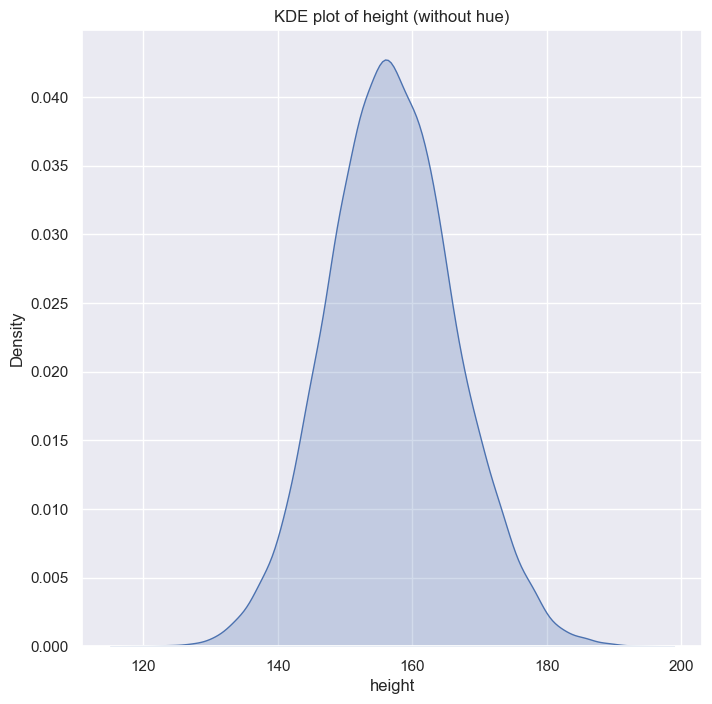

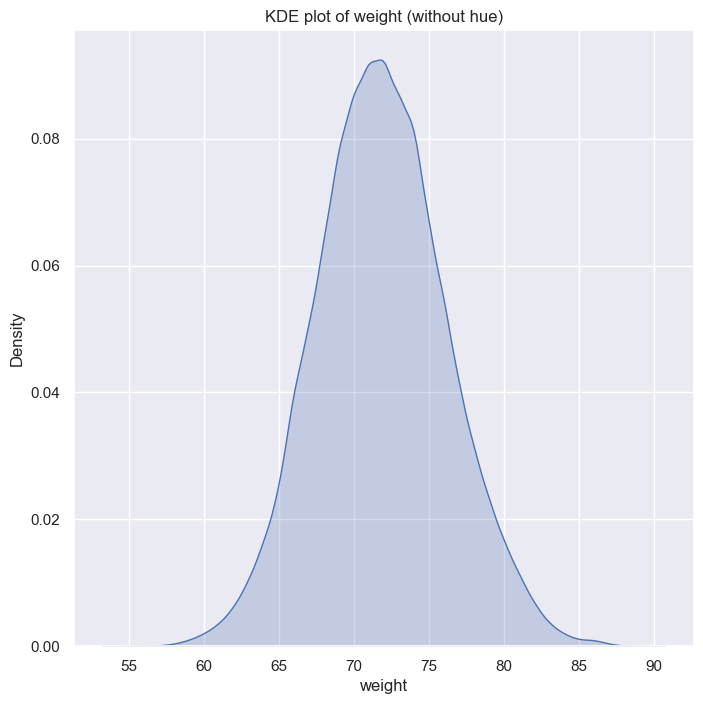

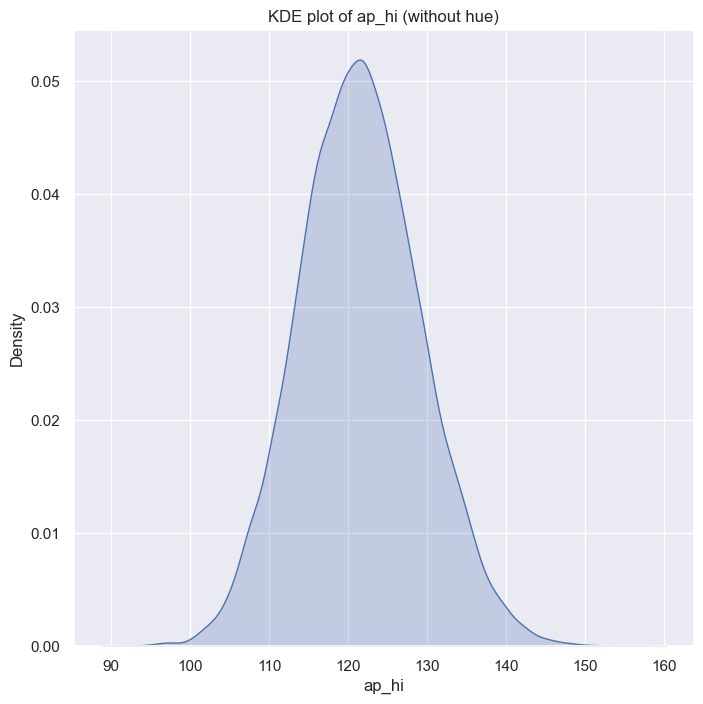

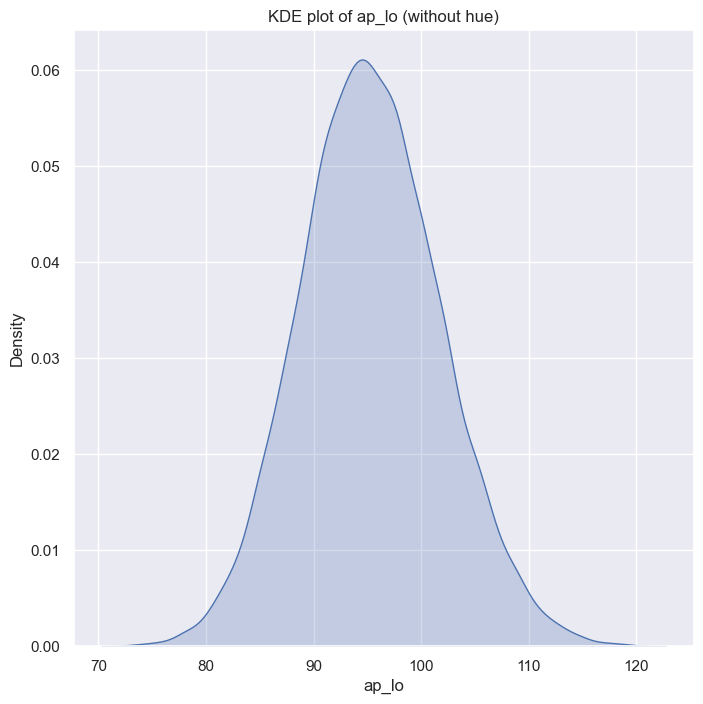

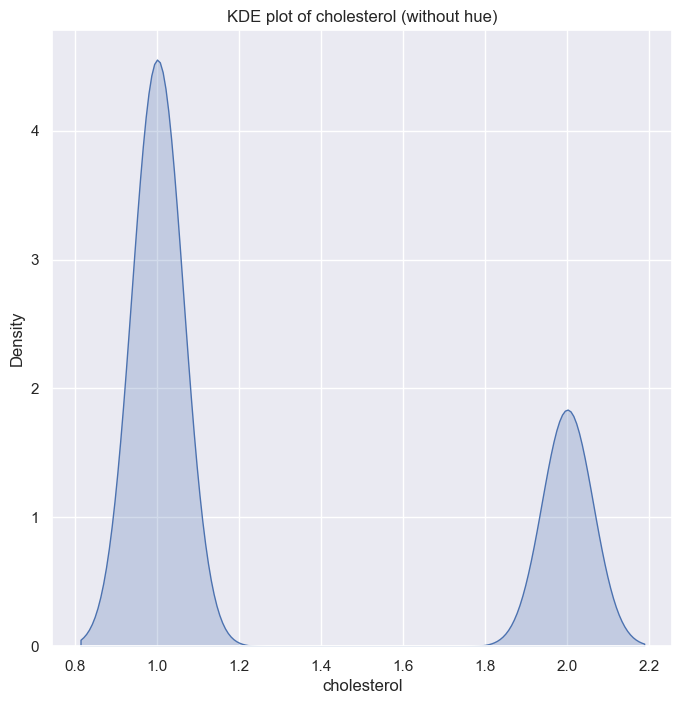

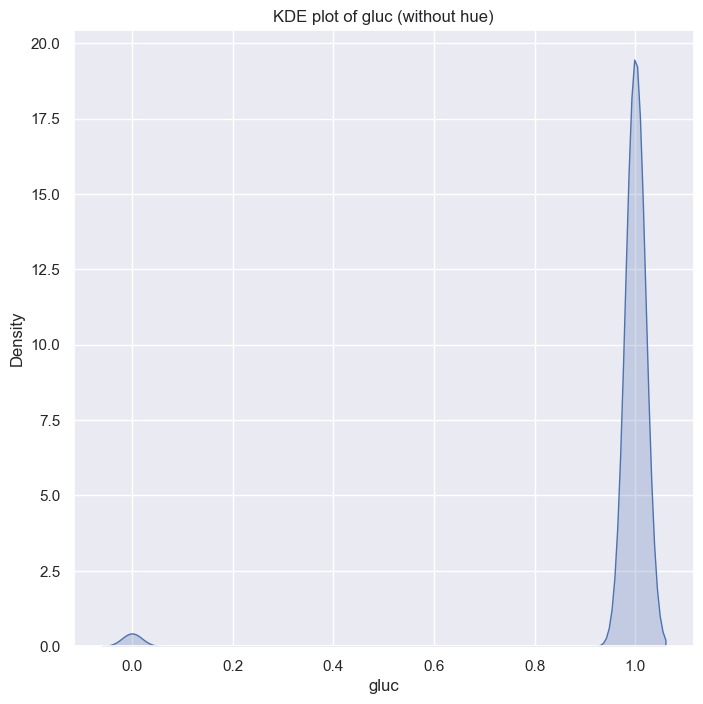

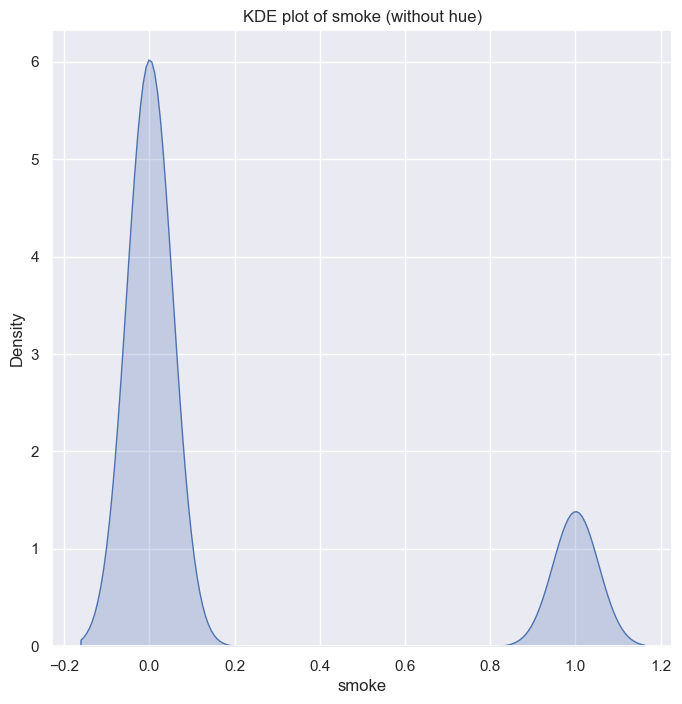

In [ ]:
# Loop for KDE plots without hue
for feature in raw_data.columns:
    if feature != 'cardio' and feature != 'Age_Bins':
        plt.figure(figsize=(8, 8))
        sns.kdeplot(x=raw_data[feature], shade=True)
        plt.xlabel(feature)
        plt.title(f'KDE plot of {feature} (without hue)')
        plt.show()


In [ ]:
# Loop for KDE plots with hue (e.g., using 'gender' as the hue column)
for feature in raw_data.columns:
    if feature != 'cardio':
        plt.figure(figsize=(8, 8))
        sns.kdeplot(x=raw_data[feature], hue=raw_data['cardio'], shade=True)
        plt.xlabel(feature)
        plt.title(f'KDE plot of {feature} (with hue)')
        plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop for histograms without hue
for feature in raw_data.columns:
    if feature != 'cardio':
        plt.figure(figsize=(8, 8))
        sns.histplot(x=raw_data[feature], kde=True)
        plt.xlabel(feature)
        plt.title(f'Histogram of {feature} (without hue)')
        plt.show()


In [ ]:
# Loop for histograms with hue (using 'cardio' as the hue column)
for feature in raw_data.columns:
    if feature != 'cardio' and feature != 'alco':
        plt.figure(figsize=(8, 8))
        sns.histplot(x=raw_data[feature], hue=raw_data['cardio'], kde=True)
        plt.xlabel(feature)
        plt.title(f'Histogram of {feature} (with cardio as hue)')
        plt.show()


In [ ]:
# Loop for box plots and outlier detection
import random

for feature in raw_data.columns:
    if feature != 'cardio' and feature != 'Age_Bins':  # Skip the target variable if needed
        plt.figure(figsize=(10, 6))
        colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
        sns.boxplot(x=raw_data[feature], color = random.choice(colorlist))
        plt.title(f'Box plot of {feature}')
        plt.xlabel(feature)
        plt.show()
        
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = raw_data[feature].quantile(0.25)
        Q3 = raw_data[feature].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = raw_data[(raw_data[feature] < lower_bound) | (raw_data[feature] > upper_bound)]
        
        # Print the number of outliers detected
        print(f'Feature: {feature}')
        print(f'Number of outliers detected: {outliers.shape[0]}')
        print(f'Outliers:\n{outliers[feature]}\n')


In [ ]:
# Loop for swarm plots and outlier detection

sample_data = raw_data.sample(n=20, random_state=42)

for feature in raw_data.columns:
    if feature != 'cardio':  # Skip the target variable if needed
        plt.figure(figsize=(12, 6))
        sns.swarmplot(x=sample_data[feature])
        plt.title(f'Swarm plot of {feature}')
        plt.xlabel(feature)
        plt.show()
        


In [ ]:
# Strip plot

sample_data = raw_data.sample(n=30, random_state=42)

for feature in raw_data.columns:
    if feature != 'cardio':  # Skip the target variable if needed
        plt.figure(figsize=(12, 6))
        sns.stripplot(x=sample_data[feature])
        plt.title(f'Strip plot of {feature}')
        plt.xlabel(feature)
        plt.show()


In [ ]:
#Violin plot

sample_data = raw_data.sample(n=30, random_state=42)


for feature in raw_data.columns:
    if feature != 'cardio' and feature != 'Age_Bins': 
        plt.figure(figsize=(12, 6))
        sns.violinplot(x=sample_data[feature])
        plt.title(f'Violin plot of {feature}')
        plt.xlabel(feature)
        plt.show()


In [ ]:
# Algorithm 1: Dropping Constant Features using Variance Threshold Technique

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the data to avoid modifying the original dataset
features = raw_data.drop(columns=['cardio'])

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in features.columns:
    if features[column].dtype == 'object' or features[column].dtype == 'category':
        le = LabelEncoder()
        features[column] = le.fit_transform(features[column].astype(str))
        label_encoders[column] = le

# Initialize the VarianceThreshold object with a threshold of 0 (to drop constant features)
var_thresh = VarianceThreshold(threshold=0)

# Apply the variance threshold to the encoded data
transformed_features = var_thresh.fit_transform(features)

# Get the retained feature names
retained_feature_names = features.columns[var_thresh.get_support()]

# Create a new DataFrame with only the retained features
filtered_data = pd.DataFrame(transformed_features, columns=retained_feature_names)

# Print the retained feature names
print("Retained features after dropping constant features:")
print(retained_feature_names)

# Print the shape before and after feature reduction
print("\nOriginal shape:", raw_data.shape)
print("Shape after dropping constant features:", filtered_data.shape)



In [ ]:
# Algorithm 2: Feature Selection using Pearson's correlation

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Copy the data to avoid modifying the original dataset
features = raw_data.drop(columns=['cardio'])

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in features.columns:
    if features[column].dtype == 'object' or features[column].dtype == 'category':
        le = LabelEncoder()
        features[column] = le.fit_transform(features[column].astype(str))
        label_encoders[column] = le

# Calculate the correlation matrix
corr_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Set a threshold for high correlation (e.g., 0.9)
threshold = 0.9

# Identify columns to drop based on the threshold
columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

# Create a new DataFrame with only the selected features
selected_features = features.drop(columns=columns_to_drop)

# Print the columns that were dropped and the ones retained
print("Columns dropped due to high correlation:")
print(columns_to_drop)

print("\nRetained features after applying Pearson's correlation:")
print(selected_features.columns)

# Print the shape before and after feature selection
print("\nOriginal shape:", features.shape)
print("Shape after applying Pearson's correlation feature selection:", selected_features.shape)



In [ ]:
# Algorithm 3: Feature Selection using Information Gain (SelectkBest and SelectPercentile)

from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectPercentile
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the features and target
X = raw_data.drop(columns=['cardio'])  # Features
y = raw_data['cardio']  # Target variable

# Encode categorical features using LabelEncoder (same as before)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object' or X[column].dtype == 'category':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column].astype(str))
        label_encoders[column] = le

# Apply SelectKBest with mutual information
k = 10  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the scores of all features
feature_scores = pd.Series(selector.scores_, index=X.columns)

# Plot the feature scores as a histogram
plt.figure(figsize=(14, 6))
feature_scores.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Scores Based on Information Gain (SelectKBest)')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

# Print the selected features
selected_features = feature_scores.nlargest(k).index
print(f"Top {k} selected features based on Information Gain:")
print(selected_features)


In [ ]:
# Algorithm 4: Feature Selection using RFECV (Recursive Feature Elimination with Cross Validation)

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the features and target
X = raw_data.drop(columns=['cardio'])  # Features
y = raw_data['cardio']  # Target variable

# Encode categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object' or X[column].dtype == 'category':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column].astype(str))
        label_encoders[column] = le

# Initialize the model and RFECV
model = RandomForestClassifier(random_state=42)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=StratifiedKFold(5),
    scoring='accuracy'
)

# Fit RFECV to the data
rfecv.fit(X, y)

# Plot the number of features vs. cross-validation scores
plt.figure(figsize=(14, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
    rfecv.cv_results_['mean_test_score'], 
    marker='o', 
    color='b'
)
plt.title('RFECV: Number of Features vs. Cross-Validation Score')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score (Accuracy)')
plt.show()

# Print the optimal number of features and the selected features
print(f"Optimal number of features: {rfecv.n_features_}")
selected_features_rfecv = X.columns[rfecv.support_]
print("Selected features:")
print(selected_features_rfecv)



Hold Out Validation Technique

In [ ]:
!pip install imbalanced-learn


In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE  # You can replace with ADASYN or BorderlineSMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Load data (assuming raw_data is already defined and contains the 'cardio' column)
X = raw_data.drop(columns = ['cardio'])
y = raw_data['cardio']

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=0, stratify=y)

# Apply SMOTE (you can try ADASYN or BorderlineSMOTE as well)
smote = SMOTE(random_state=0)  # You can change SMOTE to ADASYN() or BorderlineSMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print the shape after applying SMOTE
print(f"Original training data shape: {np.shape(X_train)}, {np.shape(y_train)}")
print(f"Resampled training data shape: {np.shape(X_train_res)}, {np.shape(y_train_res)}")



Training the model without hyperparameter Optimization. 

Decision Tree

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Logistic Regression': LogisticRegression(random_state=0),
    'SVM': SVC(random_state=0),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Create a Blending model using VotingClassifier
blending = VotingClassifier(estimators=[
    ('dt', models['Decision Tree']),
    ('knn', models['KNN']),
    ('rf', models['Random Forest']),
    ('lr', models['Logistic Regression']),
    ('svm', models['SVM'])
], voting='hard')

# Add Blending model to the models dictionary
models['Blending'] = blending

# Train all models and evaluate their performance
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print classification report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))
    print(f"{model_name} Accuracy: {accuracy:.4f}\n")

# Display results
print("\nModel Performance:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# 1. Training and Test Accuracy
train_accuracy = log_reg.score(X_train, y_train)  # Accuracy on training data
test_accuracy = accuracy_score(y_test, y_pred_log_reg)  # Accuracy on test data

# Print training and test accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 2. Classification Report (Precision, Recall, F1-Score)
classification_rep = classification_report(y_test, y_pred_log_reg, target_names=['No Cardio', 'Cardio'])
print("\nClassification Report:")
print(classification_rep)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cardio', 'Cardio'], yticklabels=['No Cardio', 'Cardio'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Define parameter grids for each model
param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # Manhattan or Euclidean distance
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
        'subsample': [0.8, 1.0]
    }
}

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Logistic Regression': LogisticRegression(random_state=0),
    'SVM': SVC(probability=True, random_state=0),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Create a Blending model using VotingClassifier with default models
blending = VotingClassifier(estimators=[
    ('dt', models['Decision Tree']),
    ('knn', models['KNN']),
    ('rf', models['Random Forest']),
    ('lr', models['Logistic Regression']),
    ('svm', models['SVM'])
], voting='hard')

# Add Blending model to the models dictionary
models['Blending'] = blending

# Initialize GridSearchCV for each model
best_models = {}

for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids.get(model_name, {}), 
                               cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

# Evaluate the performance of the best models and generate classification reports
results = {}
classification_reports = {}

for model_name, best_model in best_models.items():
    print(f"Evaluating {model_name}...")
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[model_name] = report
    print(f"\n{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

# Create a table with classification metrics
print("\nClassification Report Table:")
report_table = []

for model_name, report in classification_reports.items():
    row = [
        model_name,
        results[model_name],  # Accuracy
        report['weighted avg']['precision'],  # Precision
        report['weighted avg']['recall'],  # Recall
        report['weighted avg']['f1-score']  # F1-Score
    ]
    report_table.append(row)

# Convert table to DataFrame for better readability
report_df = pd.DataFrame(report_table, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(report_df)


In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the best SVM model after GridSearchCV
best_svm = best_models['SVM']

# Make predictions on the test set using the best SVM model
y_pred_svm = best_svm.predict(X_test)

# 1. Training and Test Accuracy
train_accuracy = best_svm.score(X_train, y_train)  # Accuracy on training data
test_accuracy = accuracy_score(y_test, y_pred_svm)  # Accuracy on test data

# Print training and test accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 2. Classification Report (Precision, Recall, F1-Score)
classification_rep = classification_report(y_test, y_pred_svm, target_names=['No Cardio', 'Cardio'])
print("\nClassification Report:")
print(classification_rep)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cardio', 'Cardio'], yticklabels=['No Cardio', 'Cardio'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
# Import necessary libraries
import numpy as np
import lime
import lime.lime_tabular
from sklearn.metrics import accuracy_score

# Assuming you have already trained the best SVM model using GridSearchCV and the data is split
# Use the best SVM model after hyperparameter optimization
best_svm = best_models['SVM']

# 1. Evaluate model performance (optional)
y_pred_svm = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Test Accuracy of the Optimized SVM: {test_accuracy:.4f}")

# 2. Initialize LIME Explainer
# Ensure that X_train_res is a NumPy array (as expected by LIME)
X_train_res_array = X_train_res.to_numpy()

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_res_array,  # Convert to NumPy array
    mode="classification",      # Since it's a classification problem
    feature_names=X_train.columns.tolist(),  # Feature names from training data
    class_names=["No Cardio", "Cardio"],  # Class names
    discretize_continuous=True  # Discretize continuous features (if necessary)
)

# 3. Choose a sample from the test set to explain
sample_idx = 0  # You can choose any index, here we use the first test sample
sample = X_test.iloc[sample_idx].values.reshape(1, -1)

# 4. Generate the explanation for the selected sample
explanation = explainer.explain_instance(
    sample[0],  # The sample to explain
    best_svm.predict_proba,  # The model's probability prediction function
    num_features=10  # Display top 10 important features
)

# 5. Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False)
